<a href="https://colab.research.google.com/github/kk-deng/PitStop-Sensor/blob/main/Pitstop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
## "red sky in the morning, sailor take warning"

----

From the definition, Independent Event means the outcome of one event does not affect the outcome of the other:

$$
P(A\cap B) = P(A) \cdot P(B)
$$

Where event **A** is "red sky" and event **B** is "storm".

$$ P(A) = (10+40)/(10+40+X+60) = 50/(110+X) $$
$$ P(B) = (10+X)/(10+40+X+60) = (10+X)/(110+X) $$
$$ P(A\cap B) = 10/(10+40+X+60) = 10/(110+X) $$

Then
$ X = 15 $ 

The Pearson's **Chi-Squared Test** can be used to determine if the storm weather is independent from the red sky.

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

# Assuming the X is 5, then
obs = np.array([[10, 5], [40, 60]])
stat, p, dof, expected = chi2_contingency(obs)
print('The test statistic: {:0.4f}'.format(stat))
print('The p-value: {:0.4f}'.format(p))
print('The degree of freedom: {:0.4f}'.format(dof))
print('The expected value: {}'.format(expected))

The test statistic: 2.7672
The p-value: 0.0962
The degree of freedom: 1.0000
The expected value: [[ 6.52173913  8.47826087]
 [43.47826087 56.52173913]]


$H_0$ hypothesis: Storm is indenpendent to red sky.

$H_1$ hypothesis: Storm is dependent to red sky.

In [2]:
# If alpha is given as 0.05
alpha = 0.05 
if p <= alpha:
  print('Reject H0 hypothesis. Dependent')
else:
  print('Fail to reject H0 hypothesis. Independent')

Fail to reject H0 hypothesis. Independent


# Question 2
## Testing Apple tree group differences

----

Read file

In [3]:
import pandas as pd

filepath = "AppleData.dat"
df_dat = pd.read_table(filepath)
df_dat

,SEASON 1
0,treated
1,"[488.0, 541.0, 494.0, 536.0, 417.0, 471.0, 421..."
2,untreated
3,"[458.0, 583.0, 478.0, 562.0, 577.0, 399.0, 416..."
4,SEASON 2
5,treated
6,"[455.0, 435.0, 543.0, 469.0, 503.0, 458.0, 467..."
7,untreated
8,"[436.0, 512.0, 523.0, 444.0, 394.0, 508.0, 457..."


In [4]:
def convert_to_series(n):
  return pd.Series(df_dat.loc[n][0].replace("[","").replace("]","").split(", "))

df = pd.DataFrame({'S1_treated': convert_to_series(1),
                   'S1_untreated': convert_to_series(3),
                   'S2_treated': convert_to_series(6),
                   'S2_untreated': convert_to_series(8)})

In [5]:
df = df.apply(pd.to_numeric)
df.head()

,S1_treated,S1_untreated,S2_treated,S2_untreated
0,488.0,458.0,455.0,436.0
1,541.0,583.0,435.0,512.0
2,494.0,478.0,543.0,523.0
3,536.0,562.0,469.0,444.0
4,417.0,577.0,503.0,394.0


First of all, we should check if all samples are distributed normally. A Q-Q plot (Quantile-Quantile Plot) was used to verify the distribution of samples is close to the normal distribution.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


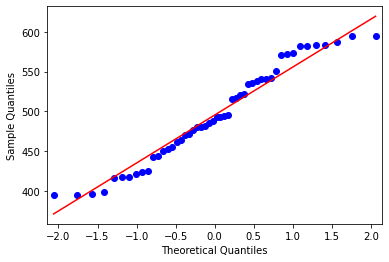

In [6]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df.S1_treated, line='s')
pyplot.show()

Let's check if two sample groups have a similar amount of variance (i.e. Homogeneity of Variance).

In [7]:
from scipy import stats
# Season 1
print(stats.levene(df.S1_treated, df.S1_untreated))

# Season 2
print(stats.levene(df.S2_treated, df.S2_untreated))

LeveneResult(statistic=0.004267968118125966, pvalue=0.9480445889021037)
LeveneResult(statistic=2.658904987818953, pvalue=0.10618150115782979)


Through the Levene test result, Season 1 group has a p-value (0.948) >> 0.05, and the Season 2 groupd has a p-value (0.106) > 0.05. It means it fails to reject the null hypothesis. We can consider both samples have equal variance.

Finally, two groups have a similar amount of variance, we should use keep `equal_var` as default value `True`.

In [8]:
(s1_statistic, s1_pvalue) = stats.ttest_ind(df.S1_treated, df.S1_untreated)
print("statistic: {:.4f}".format(s1_statistic))
print("p value: {:.4f}".format(s1_pvalue))

statistic: 0.7244
p value: 0.4706


In [9]:
(s2_statistic, s2_pvalue) = stats.ttest_ind(df.S2_treated, df.S2_untreated)
print("statistic: {:.4f}".format(s2_statistic))
print("p value: {:.4f}".format(s2_pvalue))

statistic: 3.1148
p value: 0.0024


## Conclusion
When setting the significant level $\alpha = 0.05$, the treatments for Season 1 and Season 2 are behaving differently.

From the p-value of Season 1, we can see $0.4706 >> \alpha$. We fail to reject the null hypothesis $H_0$ (It has no statistical significance between two samples). 

While the p-value of Season 2 is much smaller than $\alpha$. We have a very high confidence to reject the null hypothesis $H_0$. 

# Question 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

hosefile = "/content/hosesvmdata.dat"

df_hose = pd.read_csv(hosefile, names=["f", "rpm", "label"])

df_hose



,f,rpm,label
0,15.47,1250.0,bad
1,15.47,1250.0,bad
2,15.47,1250.0,bad
3,15.47,1250.0,bad
4,15.47,1250.0,bad
...,...,...,...
31345,20.12,750.0,good
31346,20.12,750.0,good
31347,20.12,750.0,good
31348,20.12,750.0,good


In [11]:
# df_dup = df_hose[df_hose.duplicated(['f', 'rpm', 'label'])]
after = len(df_hose[df_hose.duplicated(keep="first")])
len(df_hose) - after

168

In [12]:
y = df_hose.pop("label").values
X = df_hose.values

In [13]:
print(X.shape)
print(y.shape)

(31350, 2)
(31350,)


In [14]:
# Split samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Standardization of data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled


array([[-0.43004372,  1.18493348],
       [ 1.59571895,  1.18493348],
       [-0.38622052, -0.10522987],
       ...,
       [-0.89513508, -0.47384797],
       [-1.6033745 , -1.21108417],
       [ 0.35736019, -0.28953892]])

In [16]:
print(X_train.shape)
print(y_train.shape)

(23512, 2)
(23512,)


In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
base_model = svc.fit(X_train_scaled, y_train)

In [28]:
y_test_pred = svc.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
accuracy_score(y_test, y_test_pred)

1.0

In [31]:
confusion_matrix(y_test, y_test_pred)

array([[4345,    0],
       [   0, 3493]])

In [26]:
acc_trani vin = svc.score(X_train_scaled, y_train)
acc_test = svc.score(X_test_scaled, y_test)

In [27]:
print(acc_train, acc_test)

1.0 1.0


In [17]:
# from sklearn.svm import SVC
# model = SVC(kernel="linear")
# model.fit(X_train, y_train)